# Finite-Differenzen-Methode

In [1]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})

Die [Finite-Differenzen-Methode](https://de.wikipedia.org/wiki/Finite-Differenzen-Methode) ist eine der einfachsten numerischen Verfahren zur Lösung von Differentialgleichungen. Die Grundidee ist die Ersetzung der Ableitungsoperationen durch Differenzenformeln. Die Lösung selbst wird auf einem diskretisierten Bereich gesucht. 

## Diskretisierung

Unter Diskretisierung wird die Aufteilung des Berechnungsbereichs in endlich viele Stützstellen verstanden. Diese haben im Allgemeinen den gleichen Abstand zueinander. Werden $\sf n+1$ Stellen im Intervall $\sf [a,b]$ gewählt, so ergibt sich damit folgende Nomenklatur für den Definitions- und Wertebereich

$$ \sf \Delta x = \frac{b-a}{n} $$
$$ \sf x_i = a + i\Delta x \quad \text{mit} \quad x_0 = a, \ x_n = b $$ 
$$ \sf f_i = f(x_i) = f(a+i\Delta x) $$

Dabei wird $\sf \Delta x$ Gitterweite genannt.

In [19]:
# Anzahl der Stützstellen
n = 10

# Stützstellen
xi = np.linspace(0, 2, n)

# Gitterweite
dx = xi[1] - xi[0]

# Bsp. Funktionswerte an den Stützstellen
yi = np.sin(3*xi) + 2*xi

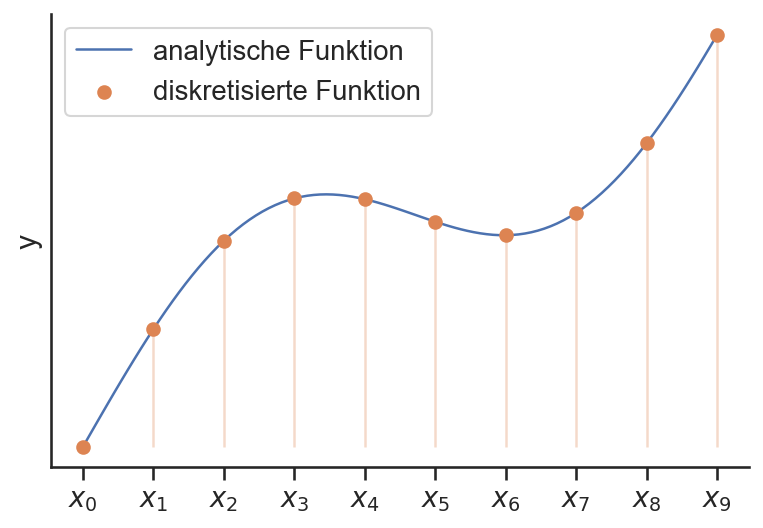

In [22]:
# für die Visualisierung der analytischen Funktion
x = np.linspace(0, 2, 100)
y = np.sin(3*x) + 2*x

# Darstellung der Daten
plt.plot(x, y, label='analytische Funktion')
plt.scatter(xi, yi, c='C1', label='diskretisierte Funktion', zorder=3)

# keine y-Achsen-Beschriftung
plt.yticks([])
plt.ylabel('y')

# angepasste x-Achsen-Beschriftung
ax = plt.gca()
ax.set_xticks(xi)
xlabels = []
for i in range(n):
    xlabels.append(f'$x_{i}$')
ax.set_xticklabels(xlabels)

# vertikale Linien
plt.vlines(xi, ymin=0, ymax=yi, color='C1', alpha=0.3)

sns.despine()
plt.legend();

## Numerische Ableitung

In Differentialgleichungen werden Ableitungen verwenden, z.B.

$$ \sf y'(x) = \frac{dy(x)}{dx} $$

Zur numerischen Lösung wird die Differentialgleichung in eine algebraische Gleichung umgewandelt, indem Differenzenformeln für die Ableitungen verwendet werden. Aufgrund der Diskretisierung ist die Schrittweite $\sf h$ durch die Gitterweite $\sf \Delta x$ bereits vorgegeben. Somit wird nur auf die vorgehaltenen Funktionswerte zurückgegriffen. 

Die Ableitungsfunktion ist somit z.B. mit der zentralen Differenzenformel zweiter Ordnung gegeben durch

$$ \sf y'(x_i) = \frac{y(x_{i+1}) - y(x_{i-1})}{2\Delta x} = \frac{y_{i+1} - y_{i-1}}{2\Delta x} $$

Bei der Berechnung der Randwerte, d.h. für $\sf i=0$ und $\sf i=n$ stehen nicht alle notwendigen Funktionswerte zur Verfügung. Hier muss auf die einseitigen Differenzenformeln zurückgegriffen werden. D.h. 

$$\sf y'(x_0) = \frac{y_1 - y_0}{\Delta x} $$
$$\sf y'(x_n) = \frac{y_n - y_{n-1}}{\Delta x} $$

Für die obige Beispielfunktion und deren Diskretisierung ergibt sich folgende numersiche Ableitung.

In [24]:
# Anlegen eines Arrays, welches die gleiche Form hat wie die 
# Diskretisierung
ypi = np.zeros_like(xi)

# Berechnung der numerischen Ableitung
# Randwert i=0
ypi[0] = (yi[1] - yi[0]) / dx
# innerer Bereich i=1...n-2
ypi[1:-1] = (yi[2:] - yi[:-2]) / (2*dx)
# Randwert i=n
ypi[-1] = (yi[-1] - yi[-2]) / dx

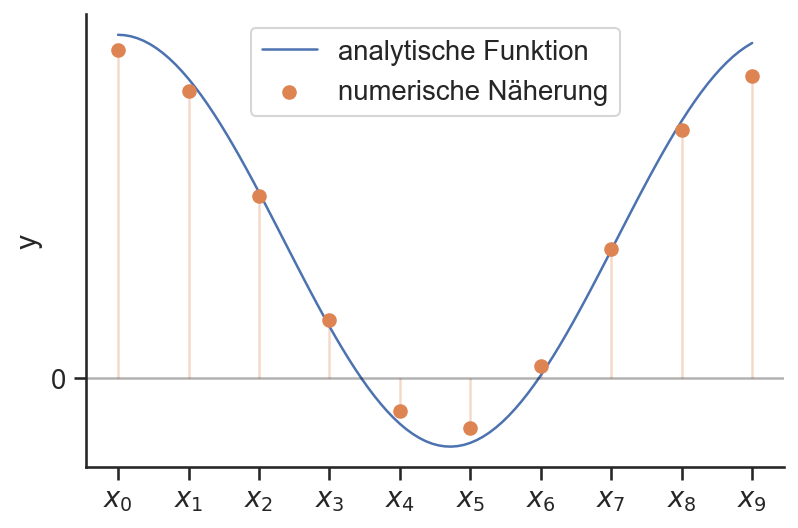

In [28]:
# für die Visualisierung der analytischen Ableitungsfunktion
yp = 3*np.cos(3*x) + 2

# Darstellung der Daten
plt.plot(x, yp, label='analytische Funktion')
plt.scatter(xi, ypi, c='C1', label='numerische Näherung', zorder=3)

# einfache y-Achsen-Beschriftung
ax = plt.gca()
plt.yticks([0])
plt.ylabel('y')
ax.set_xticklabels(['0'])

# angepasste x-Achsen-Beschriftung
ax.set_xticks(xi)
xlabels = []
for i in range(n):
    xlabels.append(f'$x_{i}$')
ax.set_xticklabels(xlabels)

# vertikale Linien
plt.vlines(xi, ymin=0, ymax=ypi, color='C1', alpha=0.3)

# Nulllinie
plt.axhline(y=0, color='Black', alpha=0.3)

sns.despine()
plt.legend();